# **TESLA STOCK PRICE PREDICTION**

## Business Understanding
### Introduction


### Problem Statement


### Objectives
#### Main Objectives


#### Specific Objectives


### Notebook Structure

i. Business Understanding

ii. Data Understanding

iii. Exploratory Data Analysis

iv. Data Preprocessing

v. Modeling

vi. Evaluation

vii. Conclusion

viii. Recommendation

ix. Next Steps



### Success Metrics



### Data Understanding




### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
# Read the 'TSLA.csv' file (Tesla stock data) into a DataFrame

df = pd.read_csv("TSLA.csv")

In [4]:
# Display the first 5 rows of the DataFrame

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
# Display the last 5 rows of the DataFrame

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
# Display the number of rows and columns of the DataFrame

df.shape

(2416, 7)

In [7]:
# Display the summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [8]:
# Generate descriptive statistics of the DataFrame

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [9]:
# Sort the 'Date' column
df_sorted = df.sort_values(by='Date')

# Find the beginning (earliest) date
start_date = df_sorted.iloc[0]['Date']

# Find the end (latest) date
end_date = df_sorted.iloc[-1]['Date']

# Display the result
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2010-06-29
End Date: 2020-02-03


In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types after conversion
print(df.dtypes)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [11]:
# checking for missing values

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#checking for duplicates

df.duplicated().sum()

0

## Exploratory Data Analysis

#### Price trends

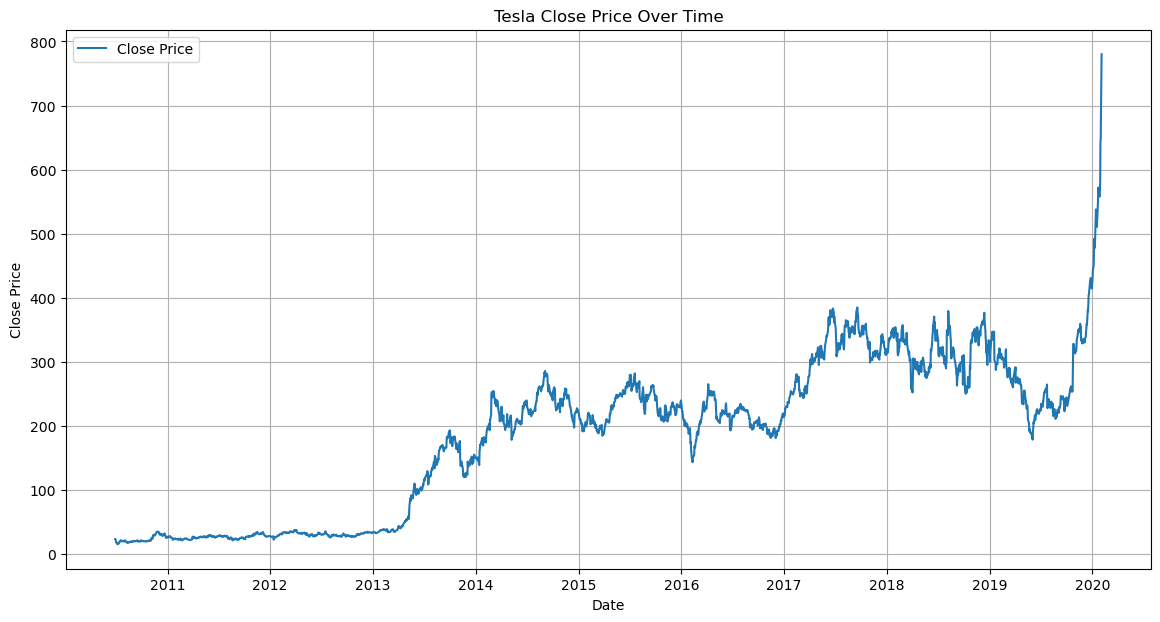

In [13]:
import matplotlib.pyplot as plt

# Plot 'Close' price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Tesla Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#### Price Distribution

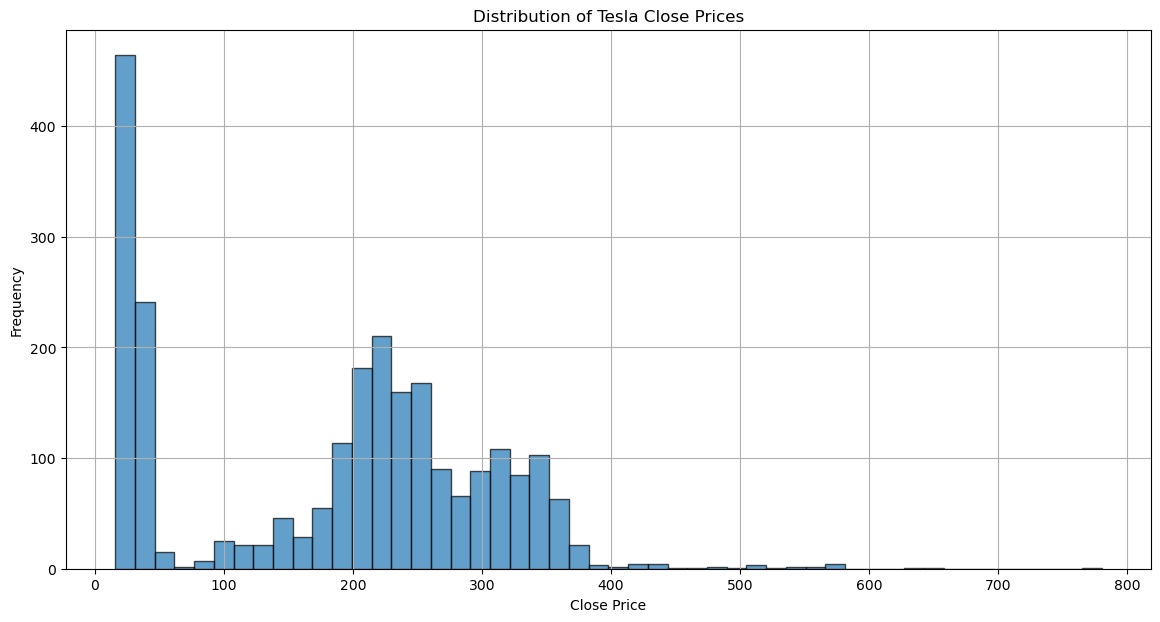

In [14]:
# Plot the distribution of 'Close' prices
plt.figure(figsize=(14, 7))
plt.hist(df['Close'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tesla Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Volume Trends

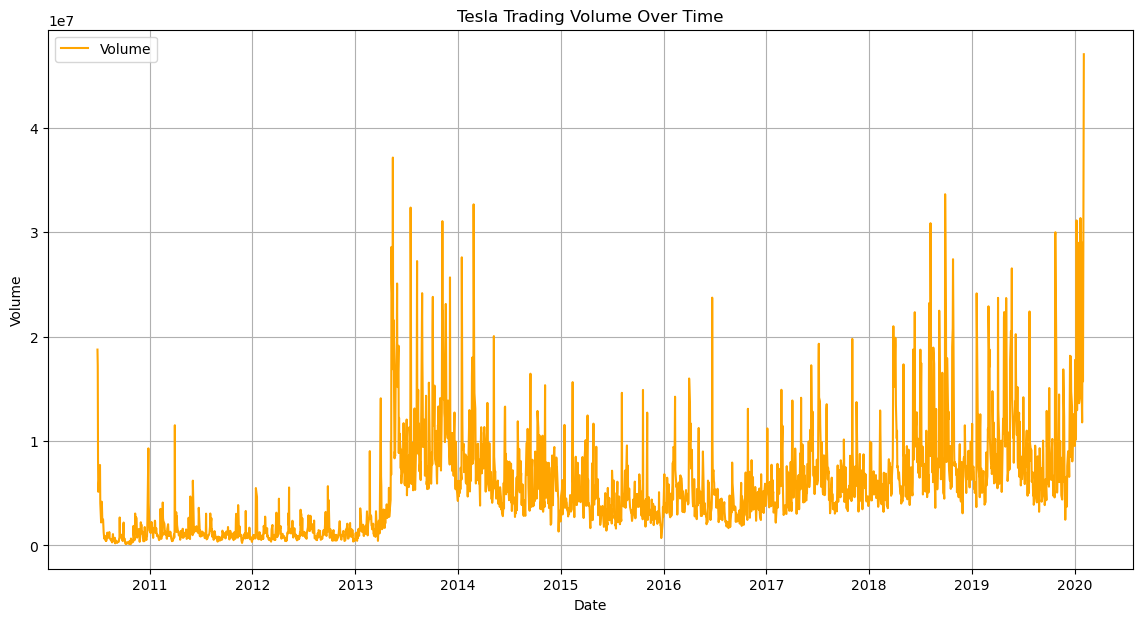

In [15]:
# Plot 'Volume' over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


#### Analyze Correlations

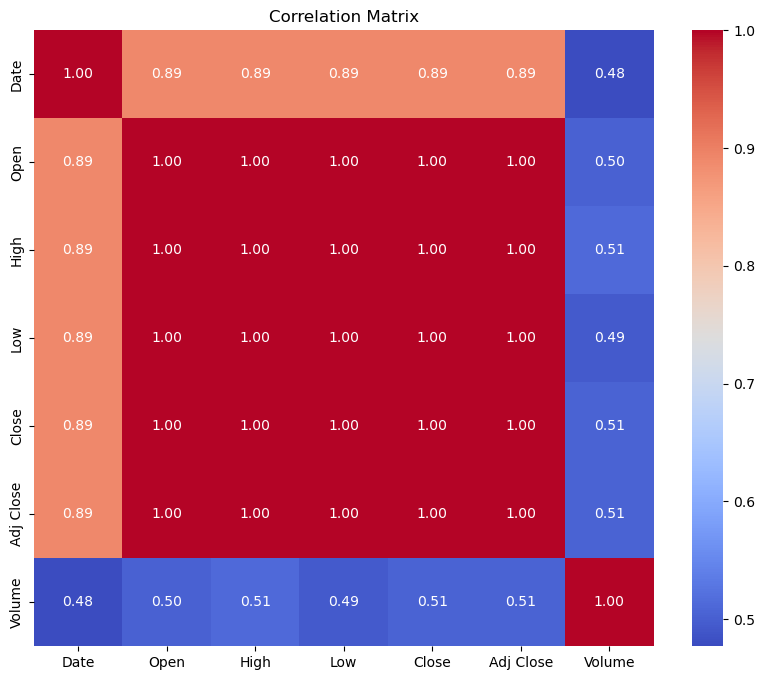

In [16]:
# Plot the correlation matrix

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Identify and Handle Outliers

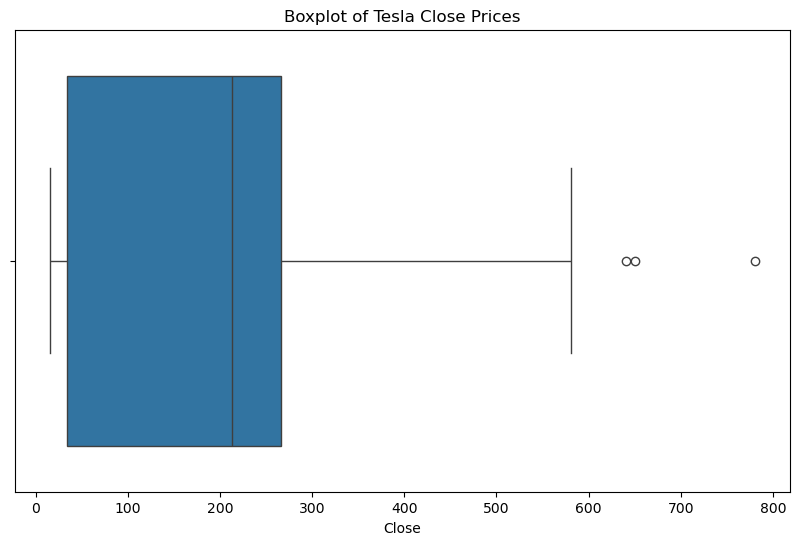

In [17]:
# Boxplot for 'Close' prices to identify outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Tesla Close Prices')
plt.show()


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

# Print outlier information
print(f'Number of outliers: {len(outliers)}')
print('Outliers:')
print(outliers)


Number of outliers: 3
Outliers:
           Date        Open        High        Low       Close   Adj Close  \
2413 2020-01-30  632.419983  650.880005  618.00000  640.809998  640.809998   
2414 2020-01-31  640.000000  653.000000  632.52002  650.570007  650.570007   
2415 2020-02-03  673.690002  786.140015  673.52002  780.000000  780.000000   

        Volume  
2413  29005700  
2414  15719300  
2415  47065000  


In [19]:
# Remove outliers from the DataFrame
df_cleaned = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

# Verify the number of rows before and after removing outliers
print(f'Original DataFrame size: {df.shape[0]}')
print(f'Cleaned DataFrame size: {df_cleaned.shape[0]}')


Original DataFrame size: 2416
Cleaned DataFrame size: 2413


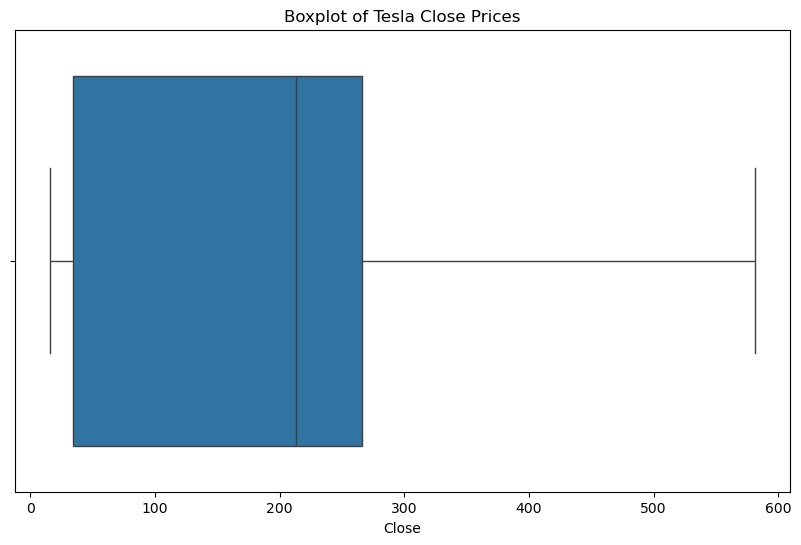

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Close'])
plt.title('Boxplot of Tesla Close Prices')
plt.show()

In [21]:
# Print the mean of 'Close' prices before and after cleaning
print(f"Mean of 'Close' prices before handling outliers: {df['Close'].mean():.2f}")
print(f"Mean of 'Close' prices after handling outliers: {df_cleaned['Close'].mean():.2f}")


Mean of 'Close' prices before handling outliers: 186.40
Mean of 'Close' prices after handling outliers: 185.78


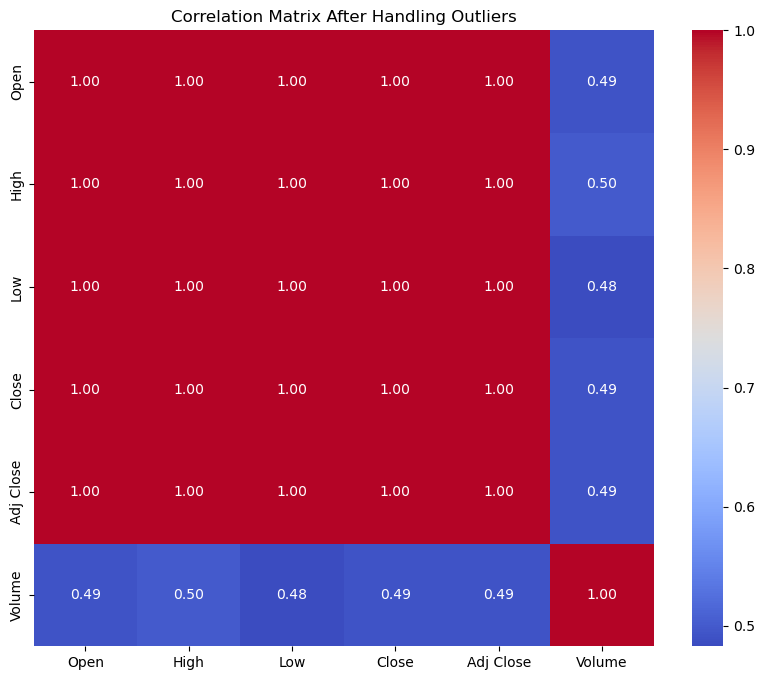

In [22]:
# Recompute the correlation matrix
correlation_matrix_cleaned = df_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the new correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Handling Outliers')
plt.show()


### Time-Series Analysis

#### a) Moving Averages

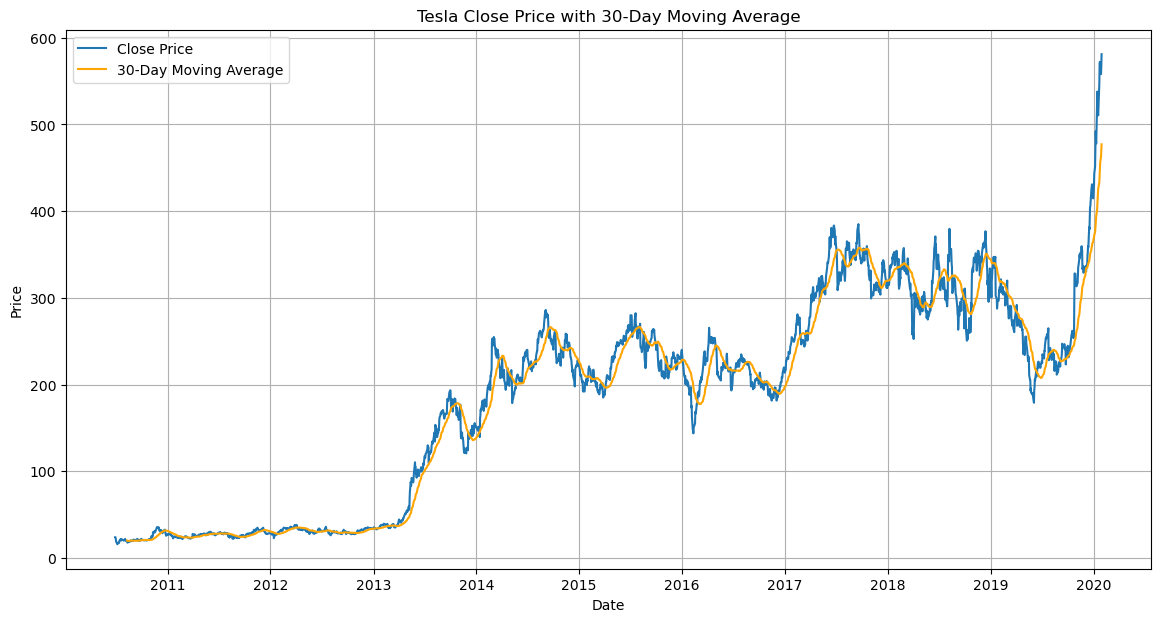

In [23]:
# Calculate a 30-day moving average for 'Close' prices
df_cleaned['30-Day MA'] = df_cleaned['Close'].rolling(window=30).mean()

# Plot the moving average along with 'Close' price
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close Price')
plt.plot(df_cleaned['Date'], df_cleaned['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.title('Tesla Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


b) Seasonality

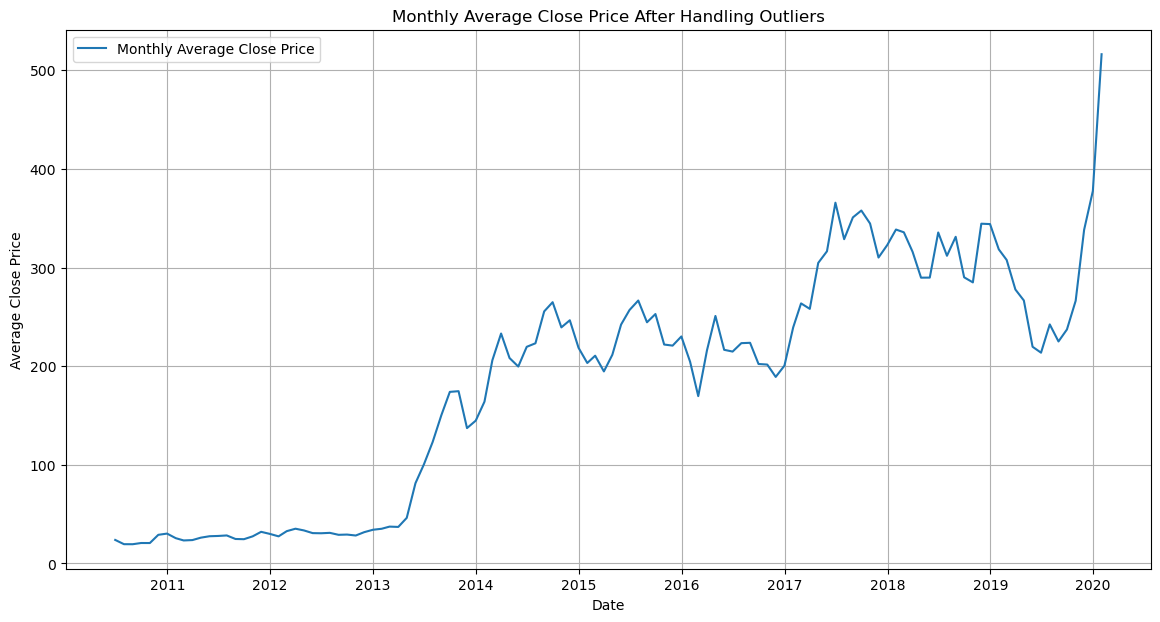

In [24]:
# Resample data by month to check for seasonality
monthly_data = df_cleaned.resample('M', on='Date').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Close'], label='Monthly Average Close Price')
plt.title('Monthly Average Close Price After Handling Outliers')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.grid(True)
plt.show()


### Feature Engineering

Creating new features to improve predictive models. These includes:
- Daily Returns: Computing the percentage change in stock prices from one day to the next.
- Volatility: Measuring the standard deviation of returns over a specific period to estimate stock price volatility.

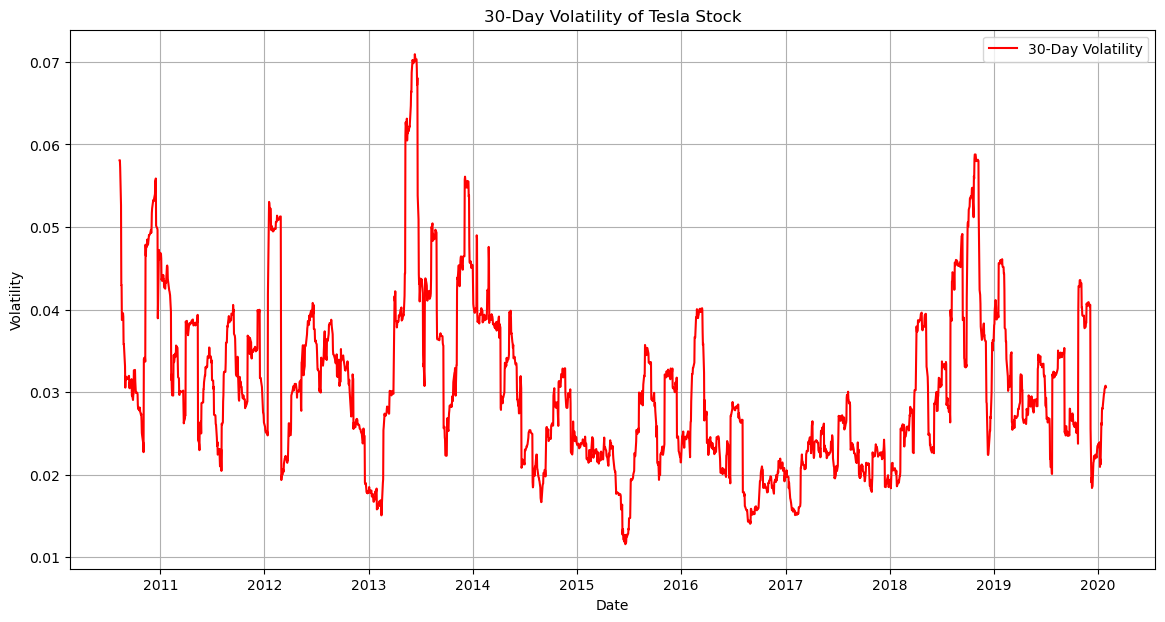

In [25]:
# Calculate daily returns
df_cleaned['Daily Return'] = df_cleaned['Close'].pct_change()

# Calculate volatility (30-day rolling standard deviation of daily returns)
df_cleaned['30-Day Volatility'] = df_cleaned['Daily Return'].rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned['Date'], df_cleaned['30-Day Volatility'], label='30-Day Volatility', color='red')
plt.title('30-Day Volatility of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


## Modeling

#### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X = df_cleaned[['Open', 'High', 'Low', 'Volume']]  # Example features
y = df_cleaned['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test data
y_pred = lr_model.predict(X_test)


In [34]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 9.177994436779244
R-squared: 0.9978208389542301


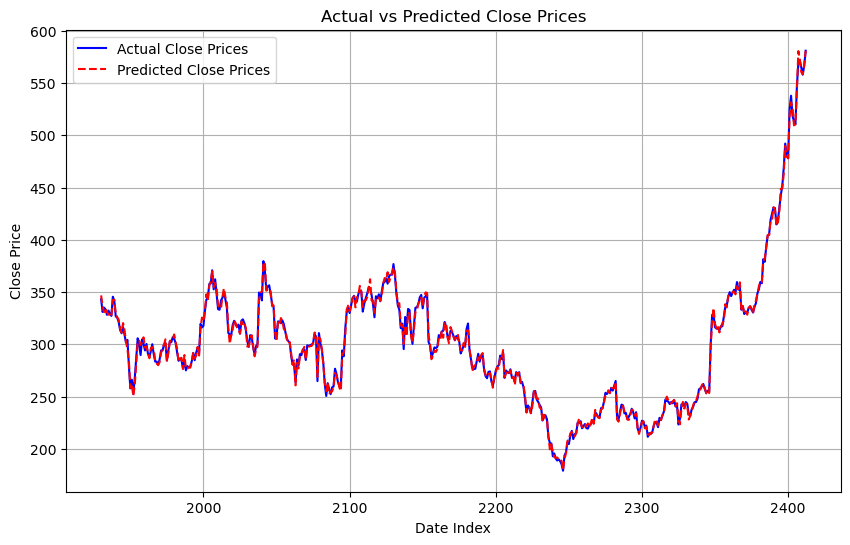

In [36]:
# Plot actual vs predicted 'Close' prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### Random Forest 

In [39]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


In [41]:
# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Squared Error: 830.4746624353694
Random Forest - R-squared: 0.8028177020214972


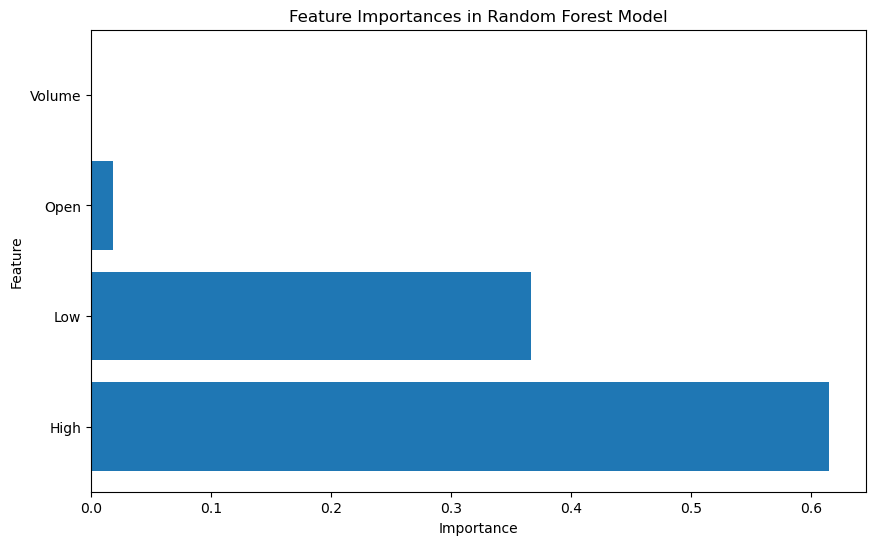

In [42]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


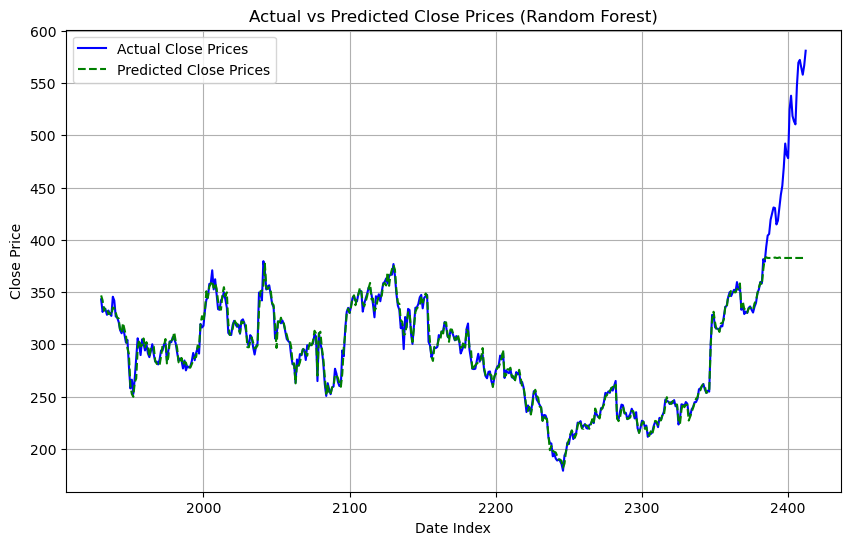

In [43]:
# Plot actual vs predicted 'Close' prices for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted Close Prices', color='green', linestyle='--')
plt.title('Actual vs Predicted Close Prices (Random Forest)')
plt.xlabel('Date Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
